In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import datetime
import time
import warnings
import missingno as msno
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
%matplotlib inline

# raw = pd.read_csv("./used_car_train_20200313.csv", parse_dates=['regDate'])
train_data = pd.read_csv("./used_car_train_20200313.csv",sep=' ',parse_dates=['regDate'])
test_data = pd.read_csv("./used_car_testA_20200313.csv",sep=' ',parse_dates=['regDate'])
warnings.filterwarnings("ignore")

power kilometer 这两个应该比较重要

In [2]:
train_data.info()
# ['bodyType' ,'fuelType','gearbox'] 三个有缺

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null object
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4      

In [3]:
train_data.head().append(train_data.tail())

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [4]:
train_data.describe()
#  power 有异常值  kilometer大部分都在15

,SaleID,name,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               50000 non-null int64
name                 50000 non-null int64
regDate              50000 non-null object
model                50000 non-null float64
brand                50000 non-null int64
bodyType             48587 non-null float64
fuelType             47107 non-null float64
gearbox              48090 non-null float64
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
seller               50000 non-null int64
offerType            50000 non-null int64
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 no

In [6]:
train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [7]:
test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

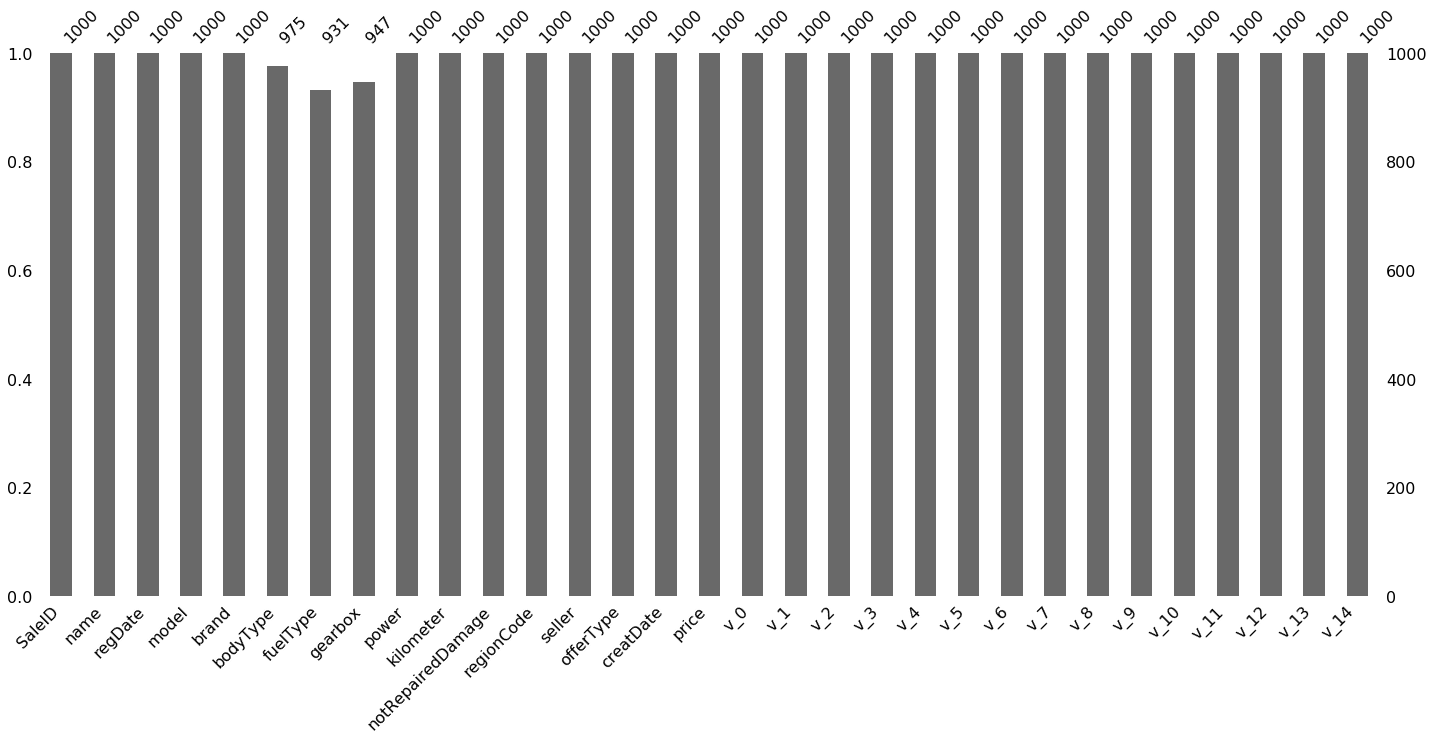

In [8]:
# 确实值的一个可视化  test / train 都需要看一下
msno.bar(train_data.sample(1000))

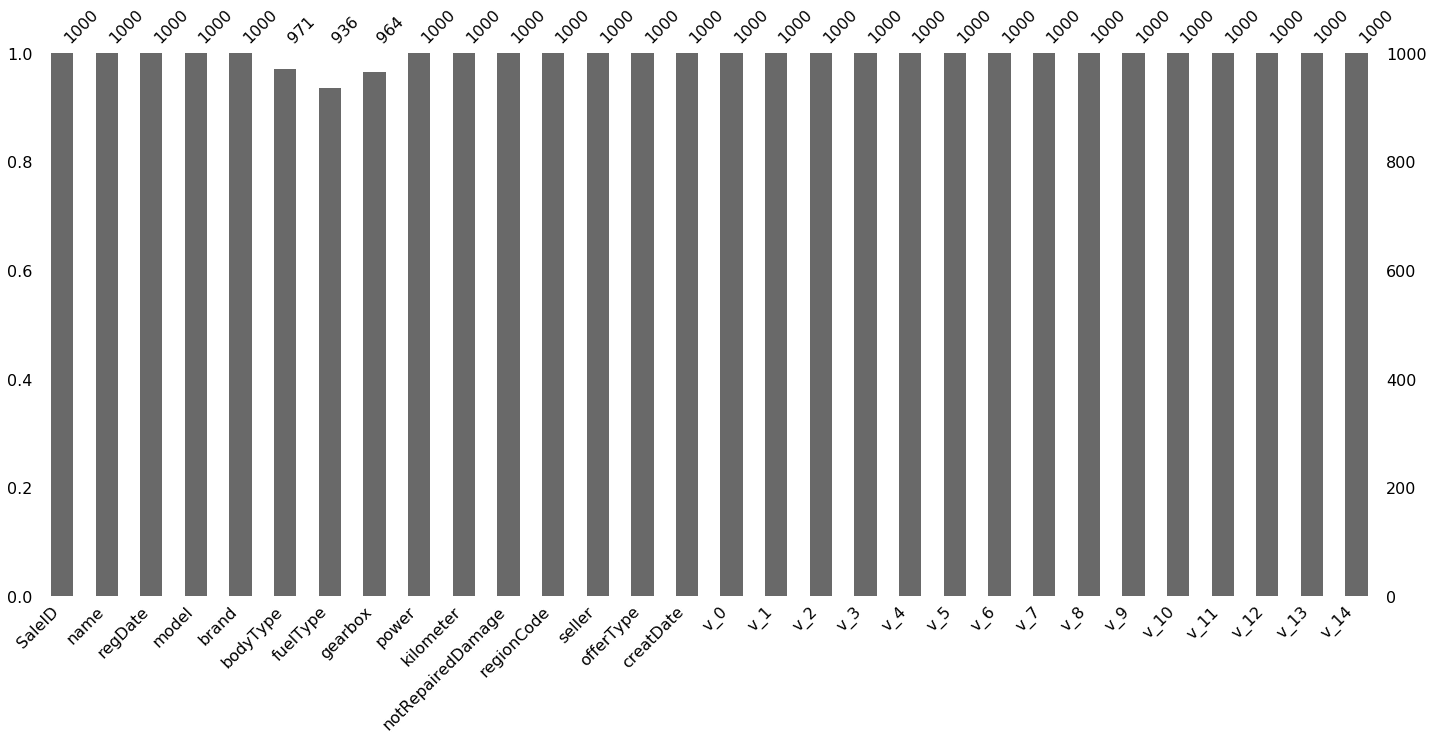

In [9]:
msno.bar(test_data.sample(1000))

In [10]:
# 异常值的检测
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null object
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4      

In [11]:
# 这里要对object类型的数据尤其注意    
train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [12]:
train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [13]:
test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [14]:
# 对于值倾斜特别严重的特征不使用
#  seller 以及 offerType 特征倾斜的特别厉害

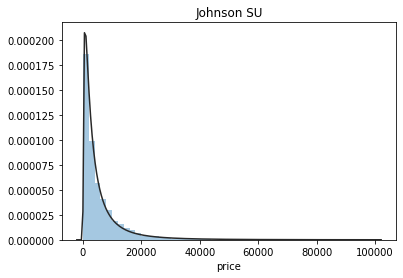

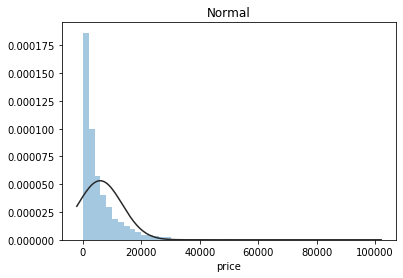

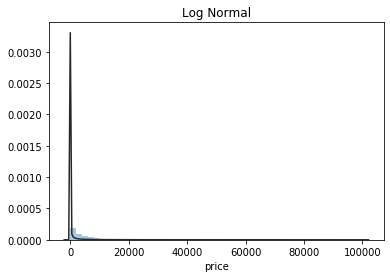

In [15]:
#  回归问题的 需要看一下预测值的分布
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
y = train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [16]:
del train_data["seller"]
del train_data["offerType"]
del test_data["seller"]
del test_data["offerType"]

了解一下预测值的分布

Skewness: 3.346487
Kurtosis: 18.995183


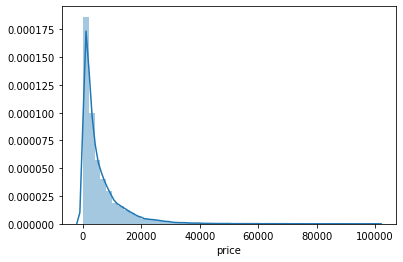

In [17]:
## 2) 查看skewness and kurtosis
sns.distplot(train_data['price']);
print("Skewness: %f" % train_data['price'].skew())
print("Kurtosis: %f" % train_data['price'].kurt())

In [18]:
train_data.skew(), train_data.kurt()

(SaleID               6.017846e-17
 name                 5.576058e-01
 regDate              2.849508e-02
 model                1.484388e+00
 brand                1.150760e+00
 bodyType             9.915299e-01
 fuelType             1.595486e+00
 gearbox              1.317514e+00
 power                6.586318e+01
 kilometer           -1.525921e+00
 notRepairedDamage    2.430640e+00
 regionCode           6.888812e-01
 creatDate           -7.901331e+01
 price                3.346487e+00
 v_0                 -1.316712e+00
 v_1                  3.594543e-01
 v_2                  4.842556e+00
 v_3                  1.062920e-01
 v_4                  3.679890e-01
 v_5                 -4.737094e+00
 v_6                  3.680730e-01
 v_7                  5.130233e+00
 v_8                  2.046133e-01
 v_9                  4.195007e-01
 v_10                 2.522046e-02
 v_11                 3.029146e+00
 v_12                 3.653576e-01
 v_13                 2.679152e-01
 v_14               

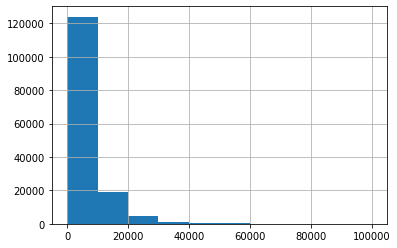

In [19]:
## 3) 查看预测值的具体频数
train_data['price'].hist()
# 查看频数, 大于20000得值极少，其实这里也可以把这些当作特殊得值（异常值）直接用填充或者删掉，再前面进行

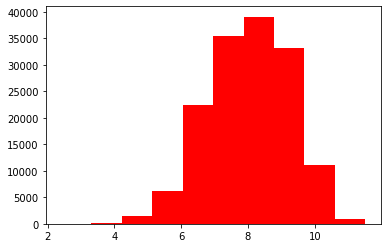

In [20]:
# # log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()

### 2.3.6 特征分为类别特征和数字特征，并对类别特征查看unique分布

In [21]:
# 分离label即预测值
Y_train = train_data['price']
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [24]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, train_data[cat_fea].nunique()))
    print(train_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64
body

In [25]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, test_data[cat_fea].nunique()))
    print(test_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个37453不同的值
55       97
708      96
387      95
1541     88
713      74
         ..
22270     1
89855     1
42752     1
48899     1
11808     1
Name: name, Length: 37453, dtype: int64
model的特征分布如下：
model特征有个247不同的值
0.0      3896
19.0     3245
4.0      3007
1.0      1981
29.0     1742
         ... 
242.0       1
240.0       1
244.0       1
243.0       1
246.0       1
Name: model, Length: 247, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
0     10348
4      5763
14     5314
10     4766
1      4532
6      3502
9      2423
5      1569
13     1245
11      919
7       795
3       773
16      771
8       704
25      695
27      650
21      544
15      511
20      450
19      450
12      389
22      363
30      324
17      317
26      303
24      268
28      225
32      193
29      117
31      115
18      106
2       104
37       92
34       77
33       76
36       67
23       62
35       53
38       23
39        2
Name: brand, dtype: int64
bodyType的特征分布如下：
bodyType特征有个8不同的值
0.

### 2.3.7 数字特征分析

In [26]:
numeric_features.append('price')
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [27]:
## 1) 相关性分析
price_numeric = train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



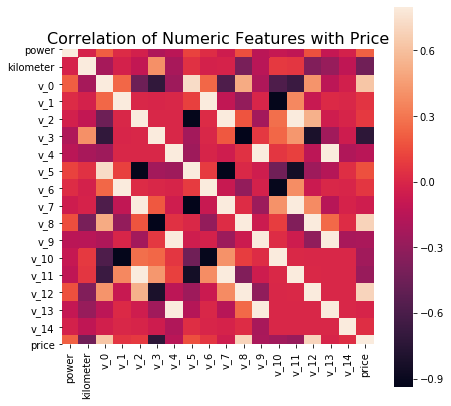

In [28]:
f , ax = plt.subplots(figsize = (7, 7))

plt.title('Correlation of Numeric Features with Price',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

In [29]:
del price_numeric['price']

In [31]:
## 2) 查看几个特征得 偏度和峰值
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train_data[col].kurt())  
         )

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39
price           Skewness: 03.35     Kurtosis: 019.00


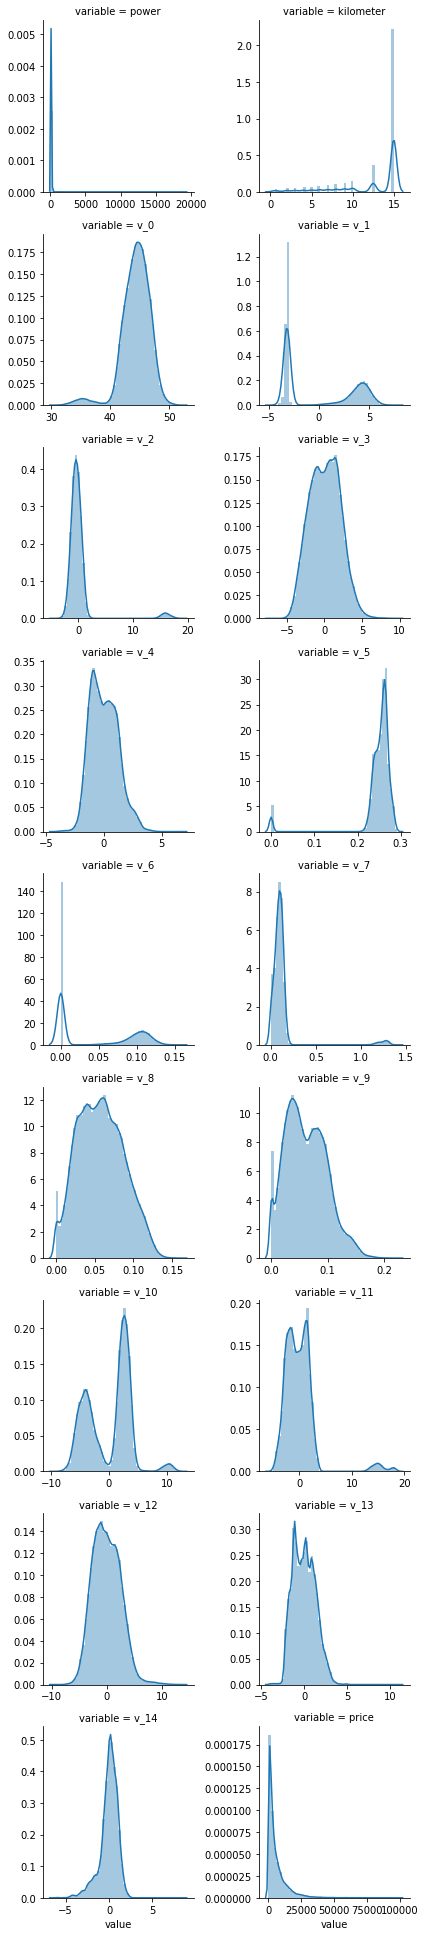

In [33]:
## 3) 每个数字特征得分布可视化
# melt 转化为长数据集
f = pd.melt(train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

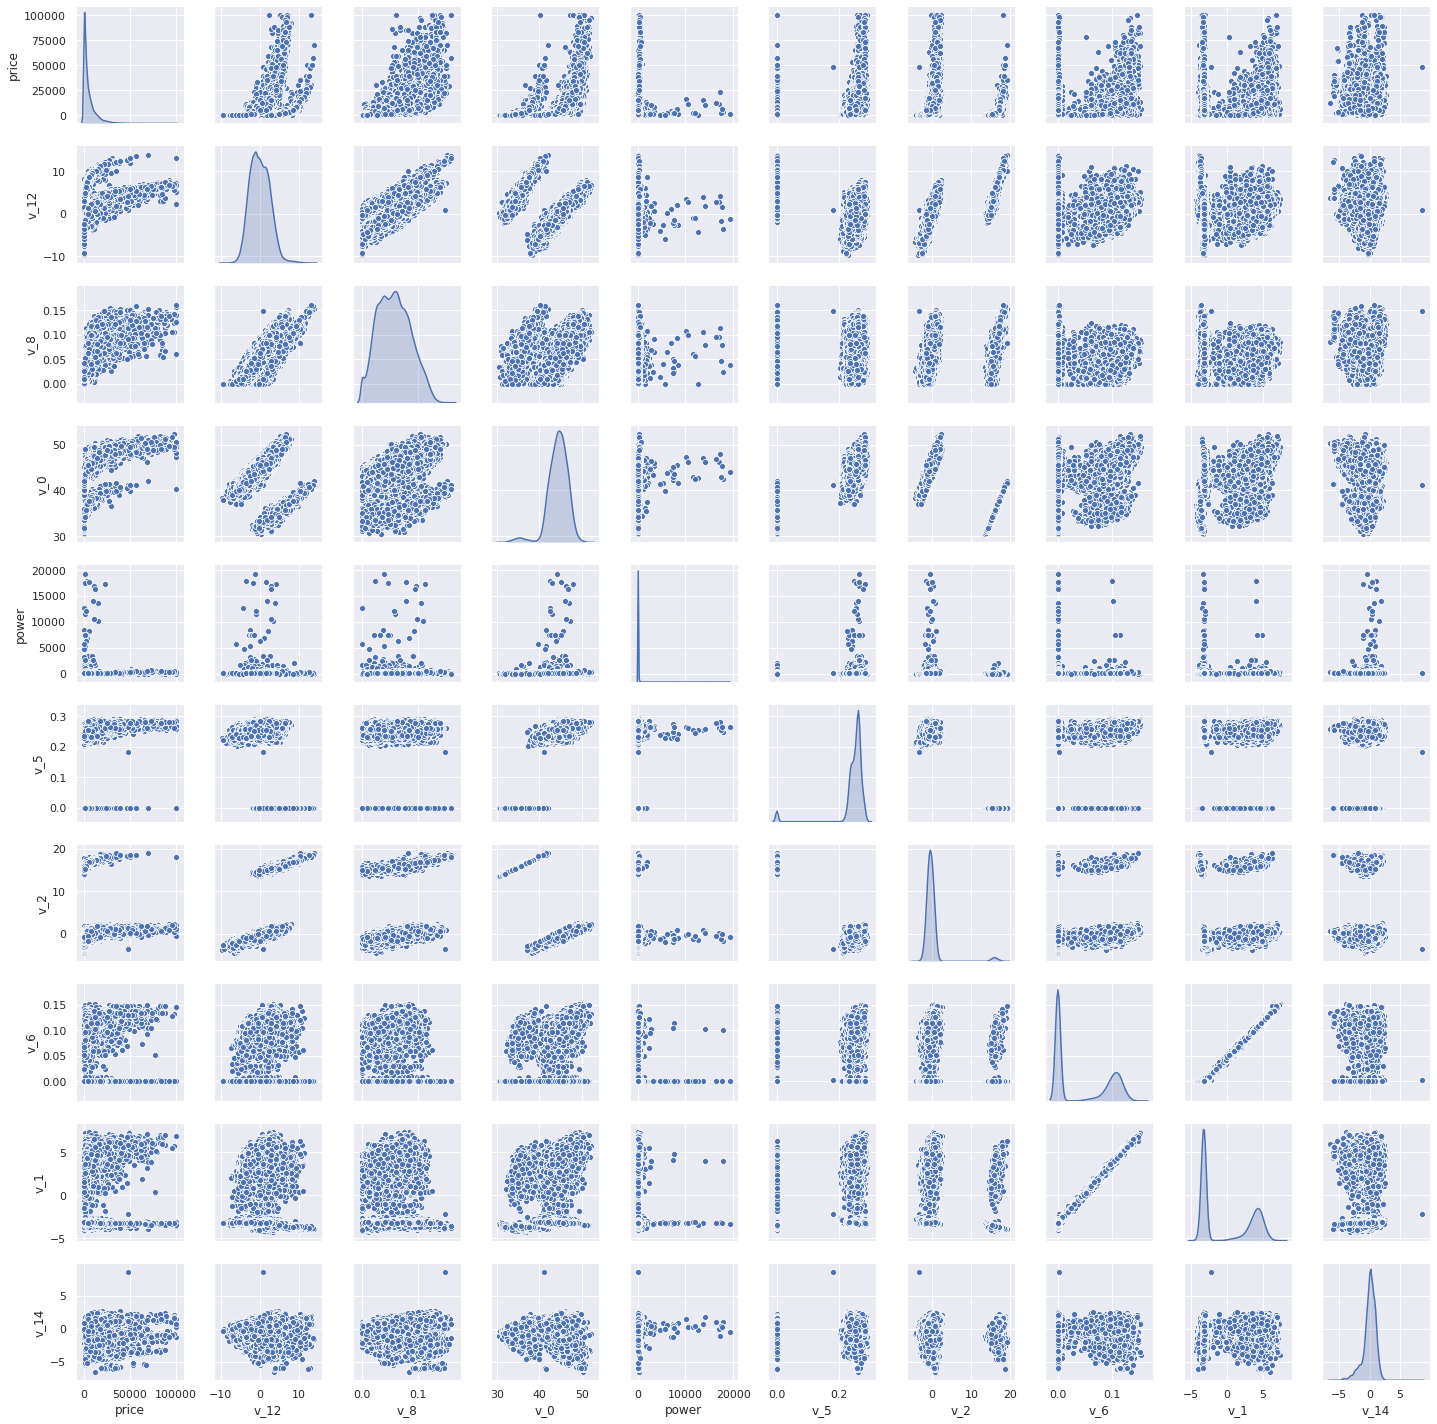

In [35]:
## 4) 数字特征相互之间的关系可视化
# 只管的看各个变量的关系
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

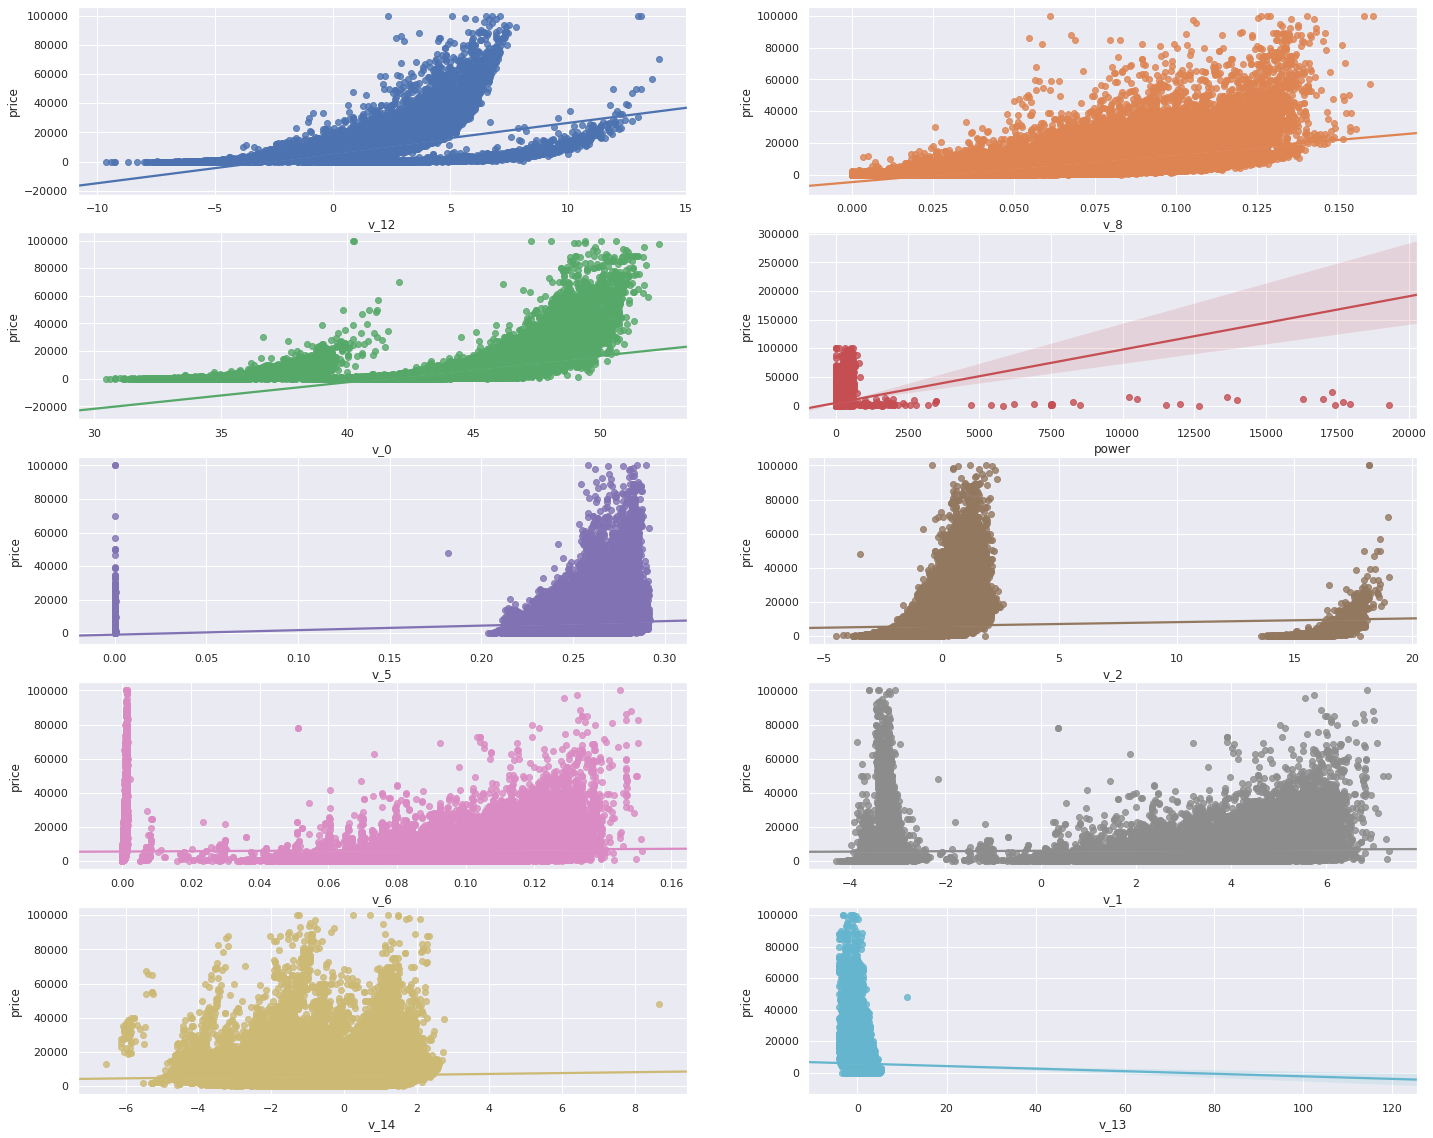

In [37]:
## 5) 多变量互相回归关系可视化
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train,train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train,train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)


### 2.3.8 类别特征分析

In [39]:
## 1) unique分布
for fea in categorical_features:
    print(train_data[fea].nunique())

99662
248
40
8
7
2
2
7905


In [40]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

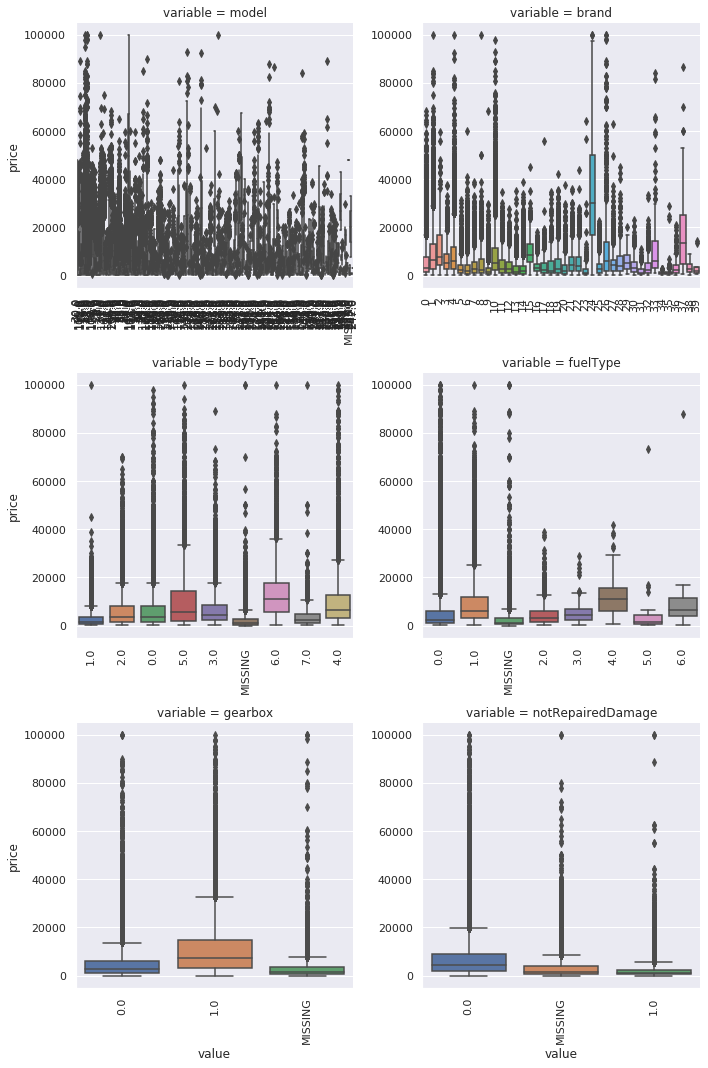

In [42]:
## 2) 类别特征箱形图可视化

# 因为 name和 regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features:
    train_data[c] = train_data[c].astype('category')
    if train_data[c].isnull().any():
        train_data[c] = train_data[c].cat.add_categories(['MISSING'])
        train_data[c] = train_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

In [ ]:
# 小提亲图用来看 数据分布的密度 越胖越集中

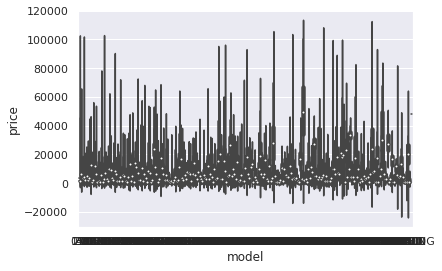

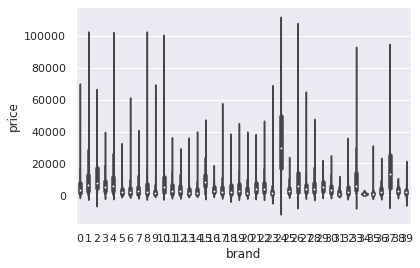

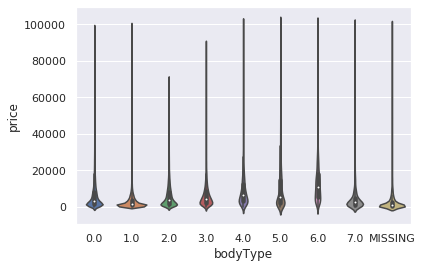

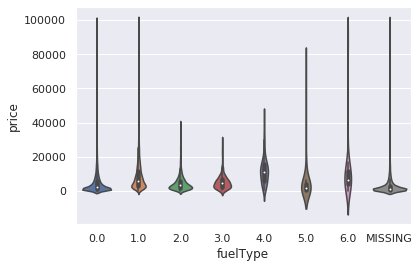

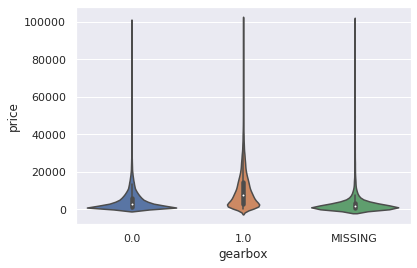

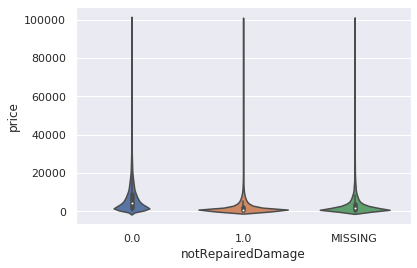

In [43]:
## 3) 类别特征的小提琴图可视化
catg_list = categorical_features
target = 'price'
for catg in catg_list :
    sns.violinplot(x=catg, y=target, data=train_data)
    plt.show()

In [44]:
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']

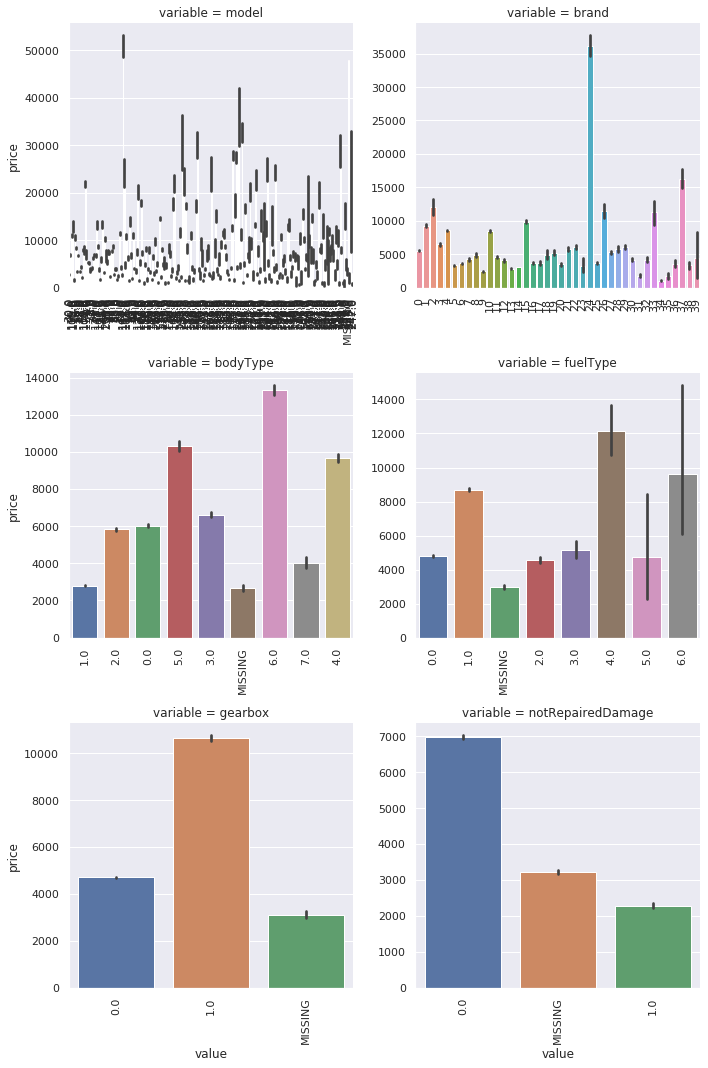

In [46]:
## 4) 类别特征的柱形图可视化
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "price")

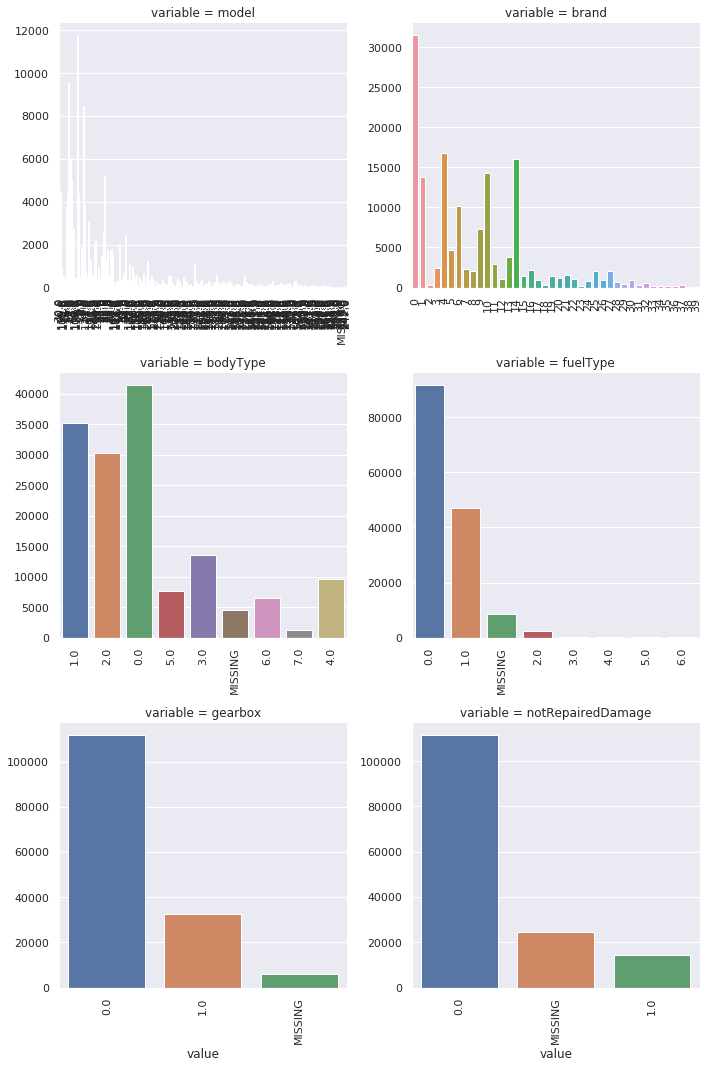

In [48]:
##  5) 类别特征的每个类别频数可视化(count_plot)
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(train_data,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")


### 2.3.9 用pandas_profiling生成数据报告

In [ ]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(train_data)
pfr.to_file("./example.html")

In [ ]:
# 应该要把摸索出来的问题记录下来 后面依次处理

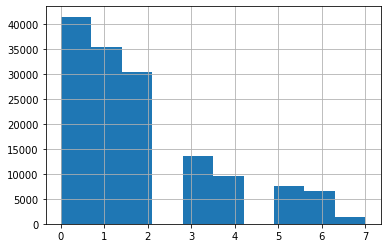

In [10]:
raw['bodyType'].hist()

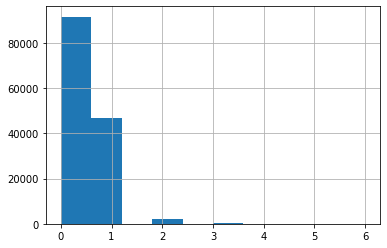

In [11]:
raw['fuelType'].hist()

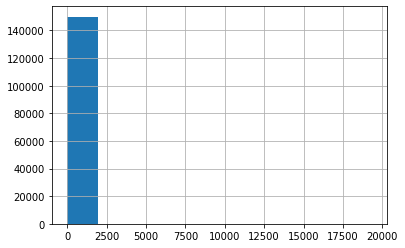

In [13]:
raw['power'].hist()

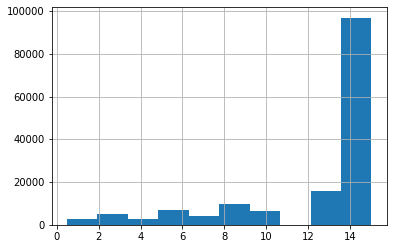

In [14]:
raw['kilometer'].hist()

In [2]:
# goods_price填充   customer_city customer_province填充编码

raw.loc[raw['goods_price']<0,'goods_price'] = np.nan
raw['goods_price'].fillna(raw['order_detail_payment'],inplace = True)
raw['customer_city'] = LabelEncoder().fit_transform(raw['customer_city'].fillna('None'))
raw['customer_province'] = LabelEncoder().fit_transform(raw['customer_province'].fillna('None'))

def fun_order_status(x):
    if(x > 6 or x <=0):
        x = 5
    return x

raw['order_status'] = raw['order_status'].apply(fun_order_status)

def fun_order_detail_status(x):
    if(x > 6 or x <=0):
        x = 5
    return x

raw['order_detail_status'] = raw['order_detail_status'].apply(fun_order_detail_status)
# order_count 一个异常用户的处理
raw.loc[raw['customer_id'] == 2785143,'order_count'] = raw['order_count'].mean()

# order_detail_discount < 0
raw.loc[raw['order_detail_discount'] < 0,'order_detail_discount'] = raw.loc[raw['order_detail_discount'] < 0,'order_detail_amount'] - raw.loc[raw['order_detail_discount'] < 0,'order_detail_payment'] 

# mem_status 填充
raw['member_status'] = raw['member_status'].fillna(-1)

# # order_total_num异常的处理
# raw = raw[raw['order_total_num']<1000]
# 购买超标的某个用户处理
# raw.loc[raw['customer_id'] == 1646629,'order_total_num'] = raw['order_total_num'].mean()
# raw.loc[raw['customer_id'] == 1646629,'order_amount'] = raw['order_amount'].mean()
# raw.loc[raw['customer_id'] == 1646629,'order_total_payment'] = raw['order_total_payment'].mean()
# raw.loc[raw['customer_id'] == 1646629,'order_detail_goods_num'] = raw['order_detail_goods_num'].mean()
# raw.loc[raw['customer_id'] == 1646629,'order_detail_amount'] = raw['order_detail_amount'].mean()
# raw.loc[raw['customer_id'] == 1646629,'order_detail_payment'] = raw['order_detail_payment'].mean()

In [32]:
# 之前各种挠头异常的处理不会 耐心花一定的时间去看看别人怎么处理的
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
#     print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
#     print("Now column number is: {}".format(data_n.shape[0]))
#     index_low = np.arange(data_series.shape[0])[rule[0]]
#     outliers = data_series.iloc[index_low]
#     print("Description of data less than the lower bound is:")
#     print(pd.Series(outliers).describe())
#     index_up = np.arange(data_series.shape[0])[rule[1]]
#     outliers = data_series.iloc[index_up]
#     print("Description of data larger than the upper bound is:")
#     print(pd.Series(outliers).describe())
    
#     fig, ax = plt.subplots(1, 2, figsize=(10, 7))
#     sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
#     sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

In [35]:
change_list  = ['order_total_num','order_amount','order_total_payment','order_total_discount','order_detail_goods_num','order_detail_amount','order_detail_payment','order_detail_discount']

In [3]:
# order_total_num
bin = [i*10 for i in range(30)]
raw['order_total_num'] = pd.cut(raw['order_total_num'],bin,labels = False)

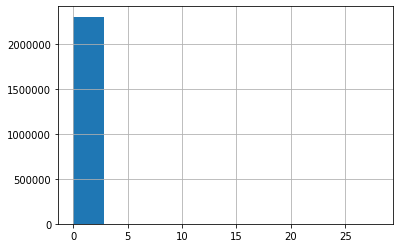

In [5]:
raw['order_total_num'].hist()

In [31]:
# # 分箱处理  (对于某些特征min max 过高的情况)  这个也要放在数据清洗的过程
# # (那这 就有一堆变量要)
# bin = [i*10 for i in range(31)]
# data['power_bin'] = pd.cut(data['power'],bin,labels = False)
# #

# # 要一直能够明确自己还有哪些是可以做的  系统的去学习这些东西

In [22]:
# 添加商品在不同省份的销量
goodsList = set(raw['goods_id'].values)
labelPro = pd.DataFrame(index=goodsList)
pro_list = set(raw['customer_province'].values)
for pro in pro_list:
    tmpPro = raw[raw['customer_province'] == pro]
    tmpPro = tmpPro.groupby('goods_id')['customer_province'].agg({"%s_count"%pro:'count'})
    labelPro["%s_count"%pro] = tmpPro
    labelPro.fillna(0,inplace = True)
raw = raw.merge(labelPro.reset_index().rename(columns = {'index':'goods_id'}),on = ['goods_id'],how = 'left')

In [23]:
# 商品在不同月份的销量
raw['month'] = raw['order_pay_time'].dt.month
t = raw.groupby(['customer_id','month']).size().reset_index().rename(columns = {0:'user_month_cnt'})
t = pd.get_dummies(t,columns=['month'],prefix = 'um')
month_list = set(raw['month'].values)
for mon in month_list:
    t['um_' + str(mon)] *= t['user_month_cnt']
raw = raw.merge(t,on = ['customer_id'])
#把需要统计的变量 one_hot

In [24]:
raw.columns.values.tolist()

['order_detail_id',
 'order_id',
 'order_total_num',
 'order_amount',
 'order_total_payment',
 'order_total_discount',
 'order_pay_time',
 'order_status',
 'order_count',
 'is_customer_rate',
 'order_detail_status',
 'order_detail_goods_num',
 'order_detail_amount',
 'order_detail_payment',
 'order_detail_discount',
 'customer_province',
 'customer_city',
 'member_id',
 'customer_id',
 'customer_gender',
 'member_status',
 'is_member_actived',
 'goods_id',
 'goods_class_id',
 'goods_price',
 'goods_status',
 'goods_has_discount',
 'goods_list_time',
 'goods_delist_time',
 '0_count',
 '1_count',
 '2_count',
 '3_count',
 '4_count',
 '5_count',
 '6_count',
 '7_count',
 '8_count',
 '9_count',
 '10_count',
 '11_count',
 '12_count',
 '13_count',
 '14_count',
 '15_count',
 '16_count',
 '17_count',
 '18_count',
 '19_count',
 '20_count',
 '21_count',
 '22_count',
 '23_count',
 '24_count',
 '25_count',
 '26_count',
 '27_count',
 '28_count',
 '29_count',
 '30_count',
 '31_count',
 '32_count',
 '3

In [25]:
exr_fea = ['0_count','1_count','2_count',
 '3_count',
 '4_count',
 '5_count',
 '6_count',
 '7_count',
 '8_count',
 '9_count',
 '10_count',
 '11_count',
 '12_count',
 '13_count',
 '14_count',
 '15_count',
 '16_count',
 '17_count',
 '18_count',
 '19_count',
 '20_count',
 '21_count',
 '22_count',
 '23_count',
 '24_count',
 '25_count',
 '26_count',
 '27_count',
 '28_count',
 '29_count',
 '30_count',
 '31_count',
 '32_count',
 '33_count','um_1',
 'um_2',
 'um_3',
 'um_4',
 'um_5',
 'um_6',
 'um_7',
 'um_8',
 'um_11',
 'um_12']

In [38]:
#  这部分要拆分为多个函数
def prerpocess(flag,raw, train='train'):
    st = time.time()
    # 性别：0未知，1男，2女
    data = pd.DataFrame(raw.groupby('customer_id')['customer_gender'].last().fillna(0))
    # 添加商品相关信息
    data[['goods_id_last', 'goods_status_last', 'goods_price_last', 'goods_has_discount_last', 'goods_list_time_last', 'goods_delist_time_last']] = raw.groupby('customer_id')['goods_id', 'goods_status', 'goods_price', 'goods_has_discount', 'goods_list_time', 'goods_delist_time'].last()
    # 添加订单相关信息
    data[['order_total_num_last', 'order_amount_last',
       'order_total_payment_last', 'order_total_discount_last', 'order_pay_time_last',
       'order_status_last', 'order_count_last', 'is_customer_rate_last',
       'order_detail_status_last', 'order_detail_goods_num_last', 'order_detail_amount_last',
       'order_detail_payment_last', 'order_detail_discount_last']] = raw.groupby('customer_id')['order_total_num', 'order_amount',
       'order_total_payment', 'order_total_discount', 'order_pay_time',
       'order_status', 'order_count', 'is_customer_rate',
       'order_detail_status', 'order_detail_goods_num', 'order_detail_amount',
       'order_detail_payment', 'order_detail_discount'].last()
    #
#     data[exr_fea] = raw.groupby('customer_id')[exr_fea].last()
    # 商品分类id
    data['goods_class_id_last'] =  raw.groupby('customer_id')['goods_class_id'].last()
    
#     test -- 
    # 用户购买商品的种类数
    data['goods_class_num'] = raw.groupby('customer_id')['goods_class_id'].nunique()
    
    # 添加商品原始价格统计字段
    data[['good_price_std', 'good_price_mean', 'good_price_min', 'good_price_max']] = raw.groupby('customer_id')['goods_price'].agg({'good_price_std':'std', 'good_price_mean':'mean', 'good_price_min':'min', 'good_price_max':'max'})
    # 添加订单实付金额统计字段
    data[['order_detail_payment_std', 'order_detail_payment_mean', 'order_detail_payment_min', 'order_detail_payment_max']] = raw.groupby('customer_id')['order_detail_payment'].agg({'order_detail_payment_std':'std', 'order_detail_payment_mean':'mean', 'order_detail_payment_min':'min', 'order_detail_payment_max':'max'})
    # 用户购买的订单数量
    data['count'] = raw.groupby('customer_id')['order_id'].nunique()
    # 用户购买的商品数量
    data['goods_count'] = raw.groupby('customer_id')['order_total_num'].sum()
    # 用户所在省份
    data['customer_province'] = raw.groupby('customer_id')['customer_province'].last()
    # 用户所在城市
    data['customer_city'] = raw.groupby('customer_id')['customer_city'].last()
    
    #-------- new -------- 
    # 用户最后一次购买的会员状态
    data['member_status'] = raw.groupby(['customer_id'])['member_status'].last()
    raw['count'] = 1
    
    
    
    # 用户活跃天数
    raw['time'] = raw['order_pay_time'].apply(lambda x:x.dayofyear)
    data['activa_days']  = raw.groupby('customer_id')['time'].nunique() 

    # 用户平均购买间隔
    tmp = raw.groupby('customer_id')['order_pay_time'].agg({'gap_min':'min','gap_max':'max','gap_count':'count'})
    tmp['gap_count'] = tmp['gap_count'].apply(lambda x:x-1 if x >= 2 else x)

    data['gap_mean'] = (tmp['gap_max']-tmp['gap_min']).dt.days/tmp['gap_count']

#     # 已激活会员切支持折扣
#     data['mem_has_discount'] = raw[(raw['goods_has_discount'] == 1) &(raw['member_status'] == 1)].groupby(['customer_id'])['count'].agg({'mem_has_discount':'count'})
#     data['mem_has_discount'].fillna(0,inplace = True)
    
    # 所购物品中有折扣的占比
    data['goods_has_discount_counts'] = raw[raw['goods_has_discount']==1].groupby(['customer_id'])['count'].agg({'goods_has_discount_counts':'count'})
    data['goods_has_discount_counts'].fillna(0,inplace = True)
    #         
    data['all'] = raw.groupby(['customer_id'])['count'].agg({'all' : 'count'})['all']
    data['goods_discount_rate'] =  data['goods_has_discount_counts'] / data['all']
    data['goods_discount_rate'].fillna(0,inplace = True)

    #用户评价的比例
    data['is_customer_rate_1'] = raw[raw['is_customer_rate']==1].groupby(['customer_id'])['count'].agg({'is_customer_rate_1':'count'})
    data['is_customer_rate_1'].fillna(0,inplace = True)
    
    # 没有评价的一个计数
    data['is_customer_rate_0'] = raw[raw['is_customer_rate']==0].groupby(['customer_id'])['count'].agg({'is_customer_rate_0':'count'})
    data['all_rate'] = raw.groupby(['customer_id'])['count'].agg({'all_rate' : 'count'})
    data['rate_ratio'] = data['is_customer_rate_1'] / data['all_rate']
    data['rate_ratio'].fillna(0,inplace = True)
   
    #所购物品中状态为1的占比(库中)
    data['goods_status_1'] = raw[raw['goods_status']==1].groupby(['customer_id'])['count'].agg({'goods_status_1':'count'})
    data['goods_status_1_rate'] = data['goods_status_1'] / data['all']
    data['goods_status_1'].fillna(0,inplace =True)
    data['goods_status_1_rate'].fillna(0,inplace = True)
    
    # 用户购买的goods数量，一个订单商品，即order_detail_id（goods_id）
    data['order_detail_count'] = raw.groupby('customer_id')['customer_id'].count()
    
    # 这里修改的部分
    # 商品折扣统计属性（sum, ave）
    data[['goods_has_discount_sum','goods_has_discount_ave']] = raw.groupby('customer_id')['goods_has_discount'].agg({'goods_has_discount_sum':'sum','goods_has_discount_ave':'sum'})
    # 订单实付金额 统计属性（sum, ave）
    data[['order_total_payment_sum','order_total_ave_pay']] = raw.groupby('customer_id')['order_total_payment'].agg({'order_total_payment_sum':'sum','order_total_ave_pay':'sum'})
    
    # 订单商品数量 统计属性（sum, ave）
    data[['order_total_num_sum', 'order_total_num_ave']] = raw.groupby('customer_id')['order_total_num'].agg({'order_total_num_sum':'sum','order_total_num_ave':'mean'})
    
    
    # 每个用户购买商品所在父订单的最好状态
    data['order_status_min'] = raw.groupby(['customer_id'])['order_status'].agg({'order_status_min':'min'})
    
    # 每个用户子订单的max状态
    data['order_status_max'] = raw.groupby(['customer_id'])['order_status'].agg({'order__status_max':'max'})
    
    # 购买的商品不支持折扣的计数
    data['goods_without_discount_counts'] = raw[raw['goods_has_discount']==0].groupby(['customer_id'])['count'].agg({'goods_without_discount_counts':'count'})
    data['goods_without_discount_counts'].fillna(0,inplace = True) 

    # 在库中商品的计数
    data['goods_status_2'] = raw[raw['goods_status']==2].groupby(['customer_id'])['count'].agg({'goods_status_0':'count'})
    data['goods_status_2'].fillna(0,inplace = True)

#     # 商品状态为未知状态
#     data['goods_status_0'] = raw[raw['goods_status']==0].groupby(['customer_id'])['count'].agg({'goods_status_0':'count'})
#     data['goods_status_0'].fillna(0,inplace = True)
    # 子订单优惠总金额
    data['order_detail_discount_count'] = raw.groupby('customer_id')['order_detail_discount'].agg({'order_detail_discount_count':'sum'})

    # 父订单优惠总金额
    data['order_total_discount_count'] = raw.groupby('customer_id')['order_total_discount'].agg({'order_total_discount_count':'sum'})

    # 用户不同城市，省份
    data['customer_province_count'] = raw.groupby('customer_id')['customer_province'].nunique()
    data['customer_city_count'] = raw.groupby('customer_id')['customer_city'].nunique()
    

    # goods_id + customer_province
    data['good_id_customer_province'] = data['customer_province'].apply(str) + "_" +data['goods_id_last'].apply(str)
    data['good_id_customer_province'] = LabelEncoder().fit_transform(data['good_id_customer_province'].fillna('None'))


    # goods_id  + 性别
    data['good_id__customer_gender'] = data['goods_id_last'].apply(str) + "_"+ data['customer_gender'].apply(str)
    data['good_id__customer_gender'] = LabelEncoder().fit_transform(data['good_id__customer_gender'].fillna('None'))

    # goods_id + 折扣标记
    data['good_id__goods_has_discount'] = data['goods_has_discount_last'].apply(str) + "_"+data['goods_id_last'].apply(str)
    data['good_id__goods_has_discount'] = LabelEncoder().fit_transform(data['good_id__goods_has_discount'].fillna('None'))


    # 订单付款时间
    data['order_pay_time_last_m'] = data['order_pay_time_last'].dt.month
    data['order_pay_time_last_d'] = data['order_pay_time_last'].dt.day
    data['order_pay_time_last_week'] = data['order_pay_time_last'].dt.weekofyear
    data['order_pay_time_last_h'] = data['order_pay_time_last'].dt.hour
    data['order_pay_time_last_min'] = data['order_pay_time_last'].dt.minute
    data['order_pay_time_last_s'] = data['order_pay_time_last'].dt.second
    
    # 构造排序特征
    # 支持会员折扣计数排序 
#     print(data['goods_has_discount_counts'].head())
    tmp = data.sort_values(by = ['goods_has_discount_counts']).reset_index().reset_index()[['index','customer_id']]
    data['goods_has_discount_rank'] = tmp.set_index('customer_id')
    data['goods_has_discount_rank'] = data['goods_has_discount_rank'].apply(lambda x:x/1585986)

    # 不支持会员折扣计数排序特征
    tmp = data.sort_values(by = ['goods_without_discount_counts']).reset_index().reset_index()[['index','customer_id']]
    data['goods_without_discount_rank'] = tmp.set_index('customer_id')
    data['goods_without_discount_rank'] = data['goods_without_discount_rank'].apply(lambda x:x/1585986)

    # 库中商品计数排序
    tmp = data.sort_values(by = ['goods_status_2']).reset_index().reset_index()[['index','customer_id']]
    data['goods_status_2_rank'] = tmp.set_index('customer_id')
    data['goods_status_2_rank'] = data['goods_status_2_rank'].apply(lambda x:x/1585986)

    #商品最大值 最小值 均值计数的rank
    tmp = data.sort_values(by = ['good_price_mean']).reset_index().reset_index()[['index','customer_id']]
    data['good_price_mean_rank'] = tmp.set_index('customer_id')
    data['good_price_mean_rank'] = data['good_price_mean_rank'].apply(lambda x:x/1585986)

    tmp = data.sort_values(by = ['good_price_min']).reset_index().reset_index()[['index','customer_id']]
    data['good_price_min_rank'] = tmp.set_index('customer_id')
    data['good_price_min_rank'] = data['good_price_min_rank'].apply(lambda x:x/1585986)

    tmp = data.sort_values(by = ['good_price_max']).reset_index().reset_index()[['index','customer_id']]
    data['good_price_max_rank'] = tmp.set_index('customer_id')
    data['good_price_max_rank'] = data['good_price_max_rank'].apply(lambda x:x/1585986)


    # 总订单总数量 rank （这个要多选一下）
    tmp = data.sort_values(by = ['order_total_num_sum']).reset_index().reset_index()[['index','customer_id']]
    data['order_total_num_sum_rank'] = tmp.set_index('customer_id')
    data['order_total_num_sum_rank'] = data['order_total_num_sum_rank'].apply(lambda x:x/1585986)

    # 实支总金额rank 
    tmp = data.sort_values(by = ['order_total_payment_sum']).reset_index().reset_index()[['index','customer_id']]
    data['order_total_payment_sum_rank'] = tmp.set_index('customer_id')
    data['order_total_payment_sum_rank'] = data['order_total_payment_sum_rank'].apply(lambda x:x/1585986)

    # 用户购买商品的种类rank
    tmp = data.sort_values(by = ['goods_class_num']).reset_index().reset_index()[['index','customer_id']]
    data['goods_class_num_rank'] = tmp.set_index('customer_id')
    data['goods_class_num_rank'] = data['goods_class_num_rank'].apply(lambda x:x/1585986)

    # 子订单优惠总金额 rank
    tmp = data.sort_values(by = ['order_detail_discount_count']).reset_index().reset_index()[['index','customer_id']]
    data['order_detail_discount_count_rank'] = tmp.set_index('customer_id')
    data['order_detail_discount_count_rank'] = data['order_detail_discount_count_rank'].apply(lambda x:x/1585986)

    # 父订单优惠总金额 rank
    tmp = data.sort_values(by = ['order_total_discount_count']).reset_index().reset_index()[['index','customer_id']]
    data['order_total_discount_count_rank'] = tmp.set_index('customer_id')
    data['order_total_discount_count_rank'] = data['order_total_discount_count_rank'].apply(lambda x:x/1585986)
    
    
    #data[['order_pay_time_last_m','order_pay_time_last_d','order_pay_time_last_week','order_pay_time_last_h','order_pay_time_last_min','order_pay_time_last_s']] = raw.groupby('customer_id')['order_pay_time_last_m','order_pay_time_last_d','order_pay_time_last_week','order_pay_time_last_h','order_pay_time_last_min','order_pay_time_last_s'].last()
    # 起始时间是从2012-11-01开始
    t_str='2012-11-01 00:00:00'
   
    t=datetime.datetime.strptime(t_str, '%Y-%m-%d %H:%M:%S')
    # 商品最新上架时间diff （距离起始时间）
    data['goods_list_time_diff'] = data['goods_list_time_last'].apply(lambda x:(x-t).days/364)
    
    # 商品最新下架时间diff （距离起始时间）
    data['goods_delist_time_diff'] = data['goods_delist_time_last'].apply(lambda x:(x-t).days/364)
    
    # 商品展示时间
    data['goods_diff'] = data['goods_delist_time_diff'] - data['goods_list_time_diff']
    
    # 商品展示时间与用户活跃时间的差
    data['activa_days_goods_diff'] = data['goods_diff'] - data['activa_days']
    
    # 付款时间diff (距离起始时间)
    data['order_pay_time_last_diff'] = data['order_pay_time_last'].apply(lambda x:(x-t).days/364)
    ed = time.time()
    # ----- new -----
    # 加一些用户的购买时间特征 用户购买的时间间隔
#     raw['order_pay_dayofyear'] = raw['order_pay_time'].dt.dayofyear
    
    data[['order_pay_dayofyear_max','order_pay_dayofyear_min']] = raw.groupby(['customer_id'])['order_pay_time'].agg({'order_pay_dayofyear_max':'max','order_pay_dayofyear_min':'min'})
    data['order_pay_gap'] = data['order_pay_dayofyear_max'] - data['order_pay_dayofyear_min']
    data['order_pay_gap'] = data['order_pay_gap'].apply(lambda x:x.days/364)
    
   
    # 用户最后一次购买距离8月底的时间
    if flag == 1:
        t_str='2013-07-30 00:00:00'
    else:
        t_str='2013-08-30 00:00:00'
    t=datetime.datetime.strptime(t_str, '%Y-%m-%d %H:%M:%S')
    data['order_pay_time_last_diff_end'] = data['order_pay_time_last'].apply(lambda x:(x-t).days/364)
    # 输出preprocess计算时间
    print(ed-st)
    
    return data

In [39]:
# 8月之前的数据作为训练集
train_raw = raw[(raw['order_pay_time'] < '2013-07-31 23:59:59')]

# # # 去掉双十一当天的数据
# train_raw = train_raw[(train_raw['order_pay_time'] < '2012-11-11 00:00:00') | (train_raw['order_pay_time'] > '2012-11-11 23:59:59')]

# # #去掉双十二当天的数据
# train_raw = train_raw[(train_raw['order_pay_time'] < '2012-12-12 00:00:00') | (train_raw['order_pay_time'] > '2012-12-12 23:59:59')]

train_raw = prerpocess(1,train_raw)

134.72454619407654


In [40]:
# #显示所有行
# pd.set_option('display.max_rows', None)
# train_raw.isnull().sum()

In [41]:
# 8月份的数据作为label_raw
label_raw = set(raw[raw['order_pay_time'] > '2013-07-31 23:59:59']['customer_id'].dropna())
# 如果该用户在8月份完成了购买 label=1, 否则为0
train_raw['labels']=train_raw.index.map(lambda x:int(x in label_raw))
test = prerpocess(2,raw)

152.48378944396973


In [30]:
# train_raw  test 尝试一些交叉的统计特征
len(train_raw[train_raw['labels']==0])

1412601

In [ ]:
len(train_raw[train_raw['labels']==1])
1412601 / 22803

# Model


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

In [43]:
# train_raw.columns.values.tolist()
fea_list = [
#  new
#  'activa_days',
#  'gap_mean',
#  'activa_days_goods_diff',
#    
 'customer_id',
 'customer_province_count',
 'goods_has_discount_rank',
 'goods_without_discount_rank',
 'goods_status_2_rank',
 'good_price_mean_rank',
#  'good_price_min_rank',
 'good_price_max_rank',
 'order_total_num_sum_rank',
 'goods_class_num_rank',
#  'order_detail_discount_count_rank',# 这个貌似可以去掉
 'order_total_discount_count_rank',
    
    
# ---- 
 'goods_without_discount_counts',
 'good_id_customer_province',
 'good_id__customer_gender',
 'good_id__goods_has_discount',
 'goods_class_num',
 'customer_gender',
#  'goods_id_last',
 'goods_status_1',
 'goods_status_1_rate',     
 'goods_status_last',
 'goods_price_last',
#  'goods_has_discount_last',
 'goods_class_id_last',
#  'goods_list_time_last',
#  'goods_delist_time_last',
 'order_total_num_last',
#  'order_amount_last',
 'order_total_payment_last',
 'order_total_discount_last',
#  'order_pay_time_last',
 'order_status_last',
 'order_count_last',
 'is_customer_rate_last',
#  'order_detail_status_last',
#  'order_detail_goods_num_last',
#  'order_detail_amount_last',
#  'order_detail_payment_last',
 'order_detail_discount_last',
 'good_price_std',
 'good_price_mean',
#  'good_price_min',
 'good_price_max',
 'order_detail_payment_std',
#  'order_detail_payment_mean',
#  'order_detail_payment_min',
#  'order_detail_payment_max',
 'count',
 'goods_count',
 'customer_province',
 'customer_city',
 'member_status',
 'goods_has_discount_counts',
#  'all',
 'goods_discount_rate',
 'is_customer_rate_1',
#  'all_rate',
 'rate_ratio',

 'order_total_payment_sum',
 'order_total_num_ave',
 'order_pay_time_last_m',
 'order_pay_time_last_d',
 'order_pay_time_last_week',
 'order_pay_time_last_h',
 'order_pay_time_last_min',
 'order_pay_time_last_s',
 'goods_list_time_diff',
#  'goods_delist_time_diff',
 'goods_diff',
#  'order_status_min',
 'order_pay_time_last_diff',
 'order_pay_gap',
#  'order_pay_time_last_diff_end',
 'labels',
 ]

# 负样本 正样本的比例 1412601/22803

In [44]:
#  负样本/正样本个数 1412601/22803

# 这些时间，之前已经根据时间提取了特征 原始的格式没法直接参与训练
# train_data = train_raw.drop(['goods_list_time_last', 'goods_delist_time_last', 'order_pay_time_last'], axis=1)
train_data = train_raw.reset_index()[fea_list]
# train_data = train_data[train_data['customer_id'] != 1646629]
# # train_data = train_data[train_data['order_total_num_last'] < 1000]
# train_data = train_data.drop('customer_id',axis = 1)

test_data = test.reset_index()[fea_list[:-1]]
# 分类变量 (考虑修改一下)
# catel = ['order_pay_time_last_h', 'order_pay_time_last_week', 'order_pay_time_last_m', 'order_detail_status_last', 'order_status_last', 'goods_status_last']

# catel = ['goods_class_id_last','order_pay_time_last_h', 'order_pay_time_last_week', 'order_pay_time_last_m', 'order_detail_status_last', 'order_status_last', 'goods_status_last', 'customer_gender']

#  'order_status_max','goods_status_last','order_status_last','customer_province','customer_city','order_pay_time_last_d','good_id_customer_province',''good_id__customer_gender','good_id__goods_has_discount','
#  这个鬼参数后面要好好看看
# catel = ['order_pay_time_last_h', 'order_pay_time_last_week', 'order_pay_time_last_m', 'order_detail_status_last', 'order_status_last', 'goods_status_last', 'customer_gender']
catel = []

In [ ]:
# train_data.info()
def re_logloss(preds,labels):   
    deta = 3.4
    y_true = labels.get_label()   # you can try this eval metric for fun
    y_pred = preds
    p = np.clip(y_pred, 1e-10, 1-1e-10)
    loss = -1/len(y_true) * np.sum(y_true * np.log(p) * deta + (1 - y_true) * np.log(1-p))
    return 're_logloss',float(loss),False

In [84]:
# %%time
# # kflod test
# X_train, X_valid, y_train, y_valid = train_test_split(train_data.drop('labels', axis=1), np.array(train_data['labels']), test_size=0.2, random_state=33)
# kf = KFold(n_splits=5,shuffle=True)
# y_pre = 0
# for train_index , test_index in kf.split(train_data):
#     # 设置每一折的train和test
#     X_train, X_valid, y_train, y_valid = train_data.drop('labels', axis=1).iloc[train_index], train_data.drop('labels', axis=1).iloc[test_index], np.array(train_data['labels'])[train_index], np.array(train_data['labels'])[test_index]
#     param = {
#     'num_leaves':121,
#     'boosting_type': 'gbdt',
#     'objective':'binary',
#     'max_depth':7,
#     'learning_rate':0.05,
#     'metric':'auc',
#      }
#     # 使用lgb进行训练
#     trn_data = lgb.Dataset(X_train, label=y_train)
#     val_data = lgb.Dataset(X_valid, label=y_valid)
#     lgbm = lgb.train(param,trn_data,valid_sets=[trn_data,val_data],num_boost_round = 10000, early_stopping_rounds=150,verbose_eval=50, categorical_feature=catel)
#     # 得到test的预测结
#     y_pre += lgbm.predict(test_data)
# #5次结果求平均
# y_pre = y_pre/5


In [46]:
%%time
# X_train, X_valid, y_train, y_valid = train_test_split(train_data.drop('labels', axis=1), np.array(train_data['labels']), test_size=0.2, random_state=33)
# kf = KFold(n_splits=5,shuffle=True)
# y_pre = 0
# for train_index , test_index in kf.split(train_data):
#     # 设置每一折的train和test
#     X_train, X_valid, y_train, y_valid = train_data.drop('labels', axis=1).iloc[train_index], train_data.drop('labels', axis=1).iloc[test_index], np.array(train_data['labels'])[train_index], np.array(train_data['labels'])[test_index]
#     param = {
#     'num_leaves':121,
#     'boosting_type': 'gbdt',
#     'objective':'binary',
#     'max_depth':7,
#     'learning_rate':0.05,
#     'metric':'binary_logloss',
#      'device': 'gpu'}
#     # 使用lgb进行训练
#     trn_data = lgb.Dataset(X_train, label=y_train)
#     val_data = lgb.Dataset(X_valid, label=y_valid)
#     lgbm = lgb.train(param,trn_data,valid_sets=[trn_data,val_data],num_boost_round = 10000, early_stopping_rounds=150,verbose_eval=50, categorical_feature=catel)
#     # 得到test的预测结果
#     test = test[X_train.columns]
#     y_pre += lgbm.predict(test)
# 5次结果求平均
# y_pre = y_pre/5

# 快速迭代 先用一个base模型检验结果
# , 
X_train, X_valid, y_train, y_valid = train_test_split(train_data.drop('labels',axis = 1), np.array(train_data['labels']), test_size=0.2,random_state=33)
# 各个参数的含义
# param = {
#     'num_leaves':121,
#     'boosting_type': 'gbdt',
#     'objective':'binary',
#     'max_depth':7,
#     'learning_rate':0.05,
#     'metric':'auc',
# #     'metric':'binary_logloss',
# #     'scale_pos_weight':61.94803315353243,
#    }

# 当正负样本比例为1:10时，scale_pos_weight=10。   1148323/18181

param = {
    'num_leaves':121,
    'boosting_type': 'gbdt',
    'objective':'binary',
    'max_depth':6,
    'learning_rate':0.05,
    'metric':'auc',
#     'reg_alpha':'0.1',
#     'bagging_fraction':'0.8',
#     'feature_fraction':'0.8',
#     'metric':'binary_logloss',
    'min_child_samples':80,
#     'is_unbalance':,
    'scale_pos_weigh':63,
}
trn_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_valid, label=y_valid)
# lgbm = lgb.train(param,trn_data,valid_sets=[trn_data,val_data],num_boost_round = 10000,feval=re_logloss,early_stopping_rounds=150,verbose_eval=50, categorical_feature=catel)

lgbm = lgb.train(param,trn_data,valid_sets=[trn_data,val_data],num_boost_round = 10000,early_stopping_rounds=150,verbose_eval=50, categorical_feature=catel)

# cv_results = lgb.cv(param, trn_data, num_boost_round=1000, nfold=5, stratified=False, shuffle=False,early_stopping_rounds=150,seed=0)

# print('best n_estimators:', len(cv_results['auc-mean']))
# print('best cv score:', pd.Series(cv_results['auc-mean']).max())


# [115]	training's binary_logloss: 0.0632348	valid_1's binary_logloss: 0.0681589
# [113]	training's binary_logloss: 0.0632055	valid_1's binary_logloss: 0.068151
# [121]	training's binary_logloss: 0.063055	valid_1's binary_logloss: 0.0681494
# [127]	training's binary_logloss: 0.0628904	valid_1's binary_logloss: 0.0681453
# [125]	training's binary_logloss: 0.0627417	valid_1's binary_logloss: 0.0680378
#[152]	training's binary_logloss: 0.0620556	valid_1's binary_logloss: 0.0680151
# [60]	training's binary_logloss: 0.0604443	valid_1's binary_logloss: 0.0688122
# [137]	training's binary_logloss: 0.0631147	valid_1's binary_logloss: 0.0678471
# [706]	training's binary_logloss: 0.0485616	valid_1's binary_logloss: 0.064868
# 主要看valid_loss

# auc------
# [152]	training's auc: 0.849776	valid_1's auc: 0.813666
# [166]	training's auc: 0.850679	valid_1's auc: 0.813534
# [133]	training's auc: 0.845929	valid_1's auc: 0.81417
# [150]	training's auc: 0.849501	valid_1's auc: 0.814265
# [205]	training's auc: 0.849153	valid_1's auc: 0.815086
# [450]	training's auc: 0.91943	valid_1's auc: 0.846891
# [300]	training's auc: 0.897197	valid_1's auc: 0.843116   base
# [628]	training's auc: 0.934325	valid_1's auc: 0.848207
# [690]	training's auc: 0.940901	valid_1's auc: 0.848356
# [481]	training's auc: 0.9237	valid_1's auc: 0.849588

Training until validation scores don't improve for 150 rounds
[50]	training's auc: 0.83207	valid_1's auc: 0.811733
[100]	training's auc: 0.846906	valid_1's auc: 0.818927
[150]	training's auc: 0.85571	valid_1's auc: 0.821086
[200]	training's auc: 0.863405	valid_1's auc: 0.822172
[250]	training's auc: 0.869182	valid_1's auc: 0.82268
[300]	training's auc: 0.87463	valid_1's auc: 0.822929
[350]	training's auc: 0.879722	valid_1's auc: 0.824681


KeyboardInterrupt: 

In [ ]:
# [1438]	training's auc: 0.940088	valid_1's auc: 0.853025

In [101]:
# 正式训练
trn_data = lgb.Dataset(train_data.drop('labels', axis=1), label=np.array(train_data['labels']))
lgbm = lgb.train(param,trn_data,num_boost_round = 1500,verbose_eval=50, categorical_feature=catel)


In [ ]:
# [1227]	training's auc: 0.937681	valid_1's auc: 0.851542

In [26]:
# import seaborn as sns
# sns.heatmap(train_data.corr())
tmp = train_data.corr()

In [29]:
from feature_selector import FeatureSelector
fs = FeatureSelector(data = train_data.drop('labels',axis=1), labels = train_data['labels'])
# 查看相关性超过一定值的fea
fs.identify_collinear(correlation_threshold=0.875)
correlated_features = fs.ops['collinear']
# correlated_features[:5]
fs.plot_collinear()

In [24]:
# [1542]	training's auc: 0.920075	valid_1's auc: 0.851408

,customer_province_count,goods_has_discount_rank,goods_without_discount_rank,goods_status_2_rank,good_price_mean_rank,good_price_min_rank,good_price_max_rank,order_total_num_sum_rank,goods_class_num_rank,order_detail_discount_count_rank,...,order_pay_time_last_h,order_pay_time_last_min,order_pay_time_last_s,goods_list_time_diff,goods_delist_time_diff,goods_diff,order_status_min,order_pay_time_last_diff,order_pay_gap,order_pay_time_last_diff_end
customer_id,,,,,,,,,,,,,,,,,,,,,
2174182,1,0.010602,0.051773,0.068388,0.236411,0.254072,0.157954,0.067371,0.061359,0.125704,...,11,43,24,2.000000,2.019231,0.019231,6,0.414835,0.000000,-0.329670
1467934,1,0.396341,0.608161,0.556953,0.373527,0.303563,0.412277,0.622745,0.584055,0.588107,...,13,25,39,1.986264,2.005495,0.019231,6,0.236264,0.000000,-0.508242
1719771,1,0.525354,0.435986,0.604216,0.699950,0.701670,0.694951,0.427344,0.493572,0.575984,...,1,55,59,0.370879,0.370879,0.000000,6,0.266484,0.000000,-0.478022
2806881,1,0.233791,0.219358,0.216262,0.357188,0.385665,0.295305,0.551440,0.212052,0.520256,...,12,39,20,1.983516,2.002747,0.019231,6,0.491758,0.000000,-0.252747
1145496,1,0.671966,0.006597,0.469850,0.691922,0.693516,0.680916,0.491458,0.441757,0.075400,...,11,10,32,1.994505,2.013736,0.019231,6,0.260989,0.000000,-0.483516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890594,1,0.123729,0.099378,0.082911,0.320650,0.344539,0.247532,0.132480,0.088783,0.249760,...,14,4,13,1.980769,2.000000,0.019231,6,0.230769,0.000000,-0.513736
2123460,1,0.021963,0.590565,0.655508,0.201538,0.112779,0.597058,0.624145,0.573390,0.545444,...,13,5,52,1.195055,1.197802,0.002747,6,0.214286,0.000000,-0.530220
1534902,1,0.598836,0.586295,0.570423,0.365023,0.260814,0.520640,0.537179,0.663280,0.544677,...,6,29,11,1.986264,2.005495,0.019231,6,0.230769,0.000000,-0.513736


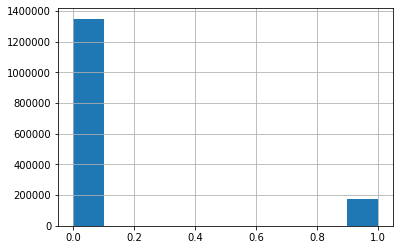

In [16]:
train_data['labels'].hist()

In [20]:
1148323/18181

63.16060722732523

In [70]:
# train_raw.loc[train_raw['goods_status_last'] == 1,'labels']

In [91]:
tmp = pd.DataFrame({
        'column': X_train.columns,
        'importance': lgbm.feature_importance(),
    }).sort_values(by='importance')
tmp

,column,importance
20,goods_status_last,56
39,goods_has_discount_counts,62
28,is_customer_rate_last,63
3,customer_province_count,96
41,is_customer_rate_1,106
0,activa_days,111
16,goods_class_num,113
34,count,120
40,goods_discount_rate,125
12,goods_without_discount_counts,142


In [102]:
# 在这之前应该对所有的train_data 不分valid_data的数据整体训练一次


# test = test[X_train.columns]
y_pre = lgbm.predict(test_data)

In [103]:
# 这个是否有必要需要测试一下  修改之后文件就大了
def f(x):
    if x < 0.1:
        return 0.1
    if x > 0.9:
        return 0.9
    return x

In [104]:
%%time
tmp = test.reset_index()
tmp['result'] = y_pre
tmp['result'] = tmp['result'].map(f)
subm = pd.DataFrame(tmp[['customer_id','result']])
subm.to_csv('submission.csv',index = False)

CPU times: user 3.86 s, sys: 694 ms, total: 4.55 s
Wall time: 4.57 s


In [42]:
len(subm)

1585986

In [ ]:

# 得到test的预测结果




# 输出feature_importance
print(pd.DataFrame({
        'column': X_train.columns,
        'importance': lgbm.feature_importance(),
    }).sort_values(by='importance'))

In [ ]:
#  这部分要拆分为多个函数
def prerpocess(raw, train='train'):
    st = time.time()
    # 性别：0未知，1男，2女
    data = pd.DataFrame(raw.groupby('customer_id')['customer_gender'].last().fillna(0))
    # 添加商品相关信息
    data[['goods_id_last', 'goods_status_last', 'goods_price_last', 'goods_has_discount_last', 'goods_list_time_last', 'goods_delist_time_last']] = raw.groupby('customer_id')['goods_id', 'goods_status', 'goods_price', 'goods_has_discount', 'goods_list_time', 'goods_delist_time'].last()
    
    
    # 添加订单相关信息
    data[['order_total_num_last', 'order_amount_last',
       'order_total_payment_last', 'order_total_discount_last', 'order_pay_time_last',
       'order_status_last', 'order_count_last', 'is_customer_rate_last',
       'order_detail_status_last', 'order_detail_goods_num_last', 'order_detail_amount_last',
       'order_detail_payment_last', 'order_detail_discount_last']] = raw.groupby('customer_id')['order_total_num', 'order_amount',
       'order_total_payment', 'order_total_discount', 'order_pay_time',
       'order_status', 'order_count', 'is_customer_rate',
       'order_detail_status', 'order_detail_goods_num', 'order_detail_amount',
       'order_detail_payment', 'order_detail_discount'].last()
    # 添加商品原始价格统计字段
    tmp = raw.groupby('customer_id')['goods_price'].agg({'good_price_mean':'mean', 'good_price_min':'min', 'good_price_max':'max'}).reset_index()
    data = data.merge(tmp, on = ['customer_id'], how = 'left')
    data['good_price_std'] = raw.groupby('customer_id')['goods_price'].agg({'good_price_std':'std'}).fillna(0)
      
    
    # 添加订单实付金额统计字段
    data[['order_detail_payment_std','order_detail_payment_mean','order_detail_payment_min','order_detail_payment_max']] = raw.groupby('customer_id')['order_detail_payment'].agg({'order_detail_payment_std':'std', 'order_detail_payment_mean':'mean', 'order_detail_payment_min':'min', 'order_detail_payment_max':'max'})
    #    data = data.merge(tmp, on = ['customer_id'], how = 'left')
    
    # 用户购买的订单数量
    data['count'] = raw.groupby('customer_id')['order_id'].nunique().reset_index()
    # 用户购买的商品数量
    tmp = raw.groupby('customer_id')['order_total_num'].sum().reset_index()
    data = data.merge(tmp, on = ['customer_id'], how = 'left')
    
    # 用户所在省份
    tmp = raw.groupby('customer_id')['customer_province'].last().reset_index()
    data = data.merge(tmp, on = ['customer_id'], how = 'left')
    # 用户所在城市
    data['customer_city'] = raw.groupby('customer_id')['customer_city'].last().reset_index()
    data = data.merge(tmp, on = ['customer_id'], how = 'left')
    # ---- new --- 3.11
    #  每个用户总订单 sum
#     tmp = raw.groupby(['customer_id'])['order_amount'].agg({'order_amount_sum':'sum'})
#     data = data.merge(tmp, on = ['customer_id'], how = 'left')
#     #  每个用户总订单实际支付的金额和
#     tmp= raw.groupby(['customer_id'])['order_total_payment'].agg({'order_total_payment_count':'count'}).reset_index()
#     data = data.merge(tmp, on = ['customer_id'], how = 'left')
#     # 每个用户总订单的优惠金额
#     tmp = raw.groupby(['customer_id'])['order_total_discount'].agg({'order_total_discount_sum':'sum'}).reset_index()
#     data = data.merge(tmp, on = ['customer_id'], how = 'left')
#     # 用户购买过的产品的最好状态，最差状态
#     tmp = raw.groupby(['customer_id'])['order_status'].agg({'order_status_max':'max','order_status_min':'min'}).reset_index()
#     data = data.merge(tmp, on = ['customer_id'], how = 'left')
#     # 子订单
#     tmp = raw.groupby(['customer_id'])['order_detail_amount'].agg({'order_detail_amount_sum':'sum'}).reset_index()
#     data = data.merge(tmp, on = ['customer_id'], how = 'left')
#     tmp = raw.groupby(['customer_id'])['order_detail_payment'].agg({'order_detail_payment_sum':'sum','order_detail_payment_count':'count'}).reset_index()
#     data = data.merge(tmp, on = ['customer_id'], how = 'left')
    
#     tmp = raw.groupby(['customer_id'])['order_detail_discount'].agg({'order_detail_discount_sum':'sum'}).reset_index()
#     data = data.merge(tmp, on = ['customer_id'], how = 'left')
#     tmp = raw.groupby(['customer_id'])['order_detail_status'].agg({'order_detail_status_max':'max','order_detail_status_min':'min'}).reset_index()
#     data = data.merge(tmp, on = ['customer_id'], how = 'left')
 
    #-------- new -------- 3.08

    # 用户最后一次购买的会员状态
    data['member_status'] = raw.groupby(['customer_id'])['member_status'].last()
#     data['is_member_actived'] = raw.groupby(['customer_id'])['is_member_actived'].last()
    

    # 所购物品中有折扣的占比
    raw['count'] = 1
    # data['goods_has_discount_counts'] = raw[raw['goods_has_discount']==1].groupby(['customer_id'])['count'].agg({'goods_has_discount_counts':'count'})
    tmp = raw[raw['goods_has_discount']==1].groupby(['customer_id'])['count'].agg({'goods_has_discount_counts':'count'}).reset_index()
    data = data.merge(tmp,on=['customer_id'],how='left')
  
    raw['count'] = 1
    tmp = raw.groupby(data['customer_id'])['count'].agg({'all' : 'count'})['all'].reset_index()
    data = data.merge(tmp,on=['customer_id'],how='left')
    data['goods_discount_rate'] =  data['goods_has_discount_counts'] / data['all']
    data['goods_discount_rate'].fillna(0,inplace = True)
    
    
    #用户评价的比例
    raw['count'] = 1
    tmp = raw[raw['is_customer_rate']==1].groupby(['customer_id'])['count'].agg({'is_customer_rate_1':'count'}).reset_index()
    data = data.merge(tmp,on=['customer_id'],how='left')
    
    data['count'] = 1
    tmp = raw.groupby(['customer_id'])['count'].agg({'all_rate' : 'count'}).reset_index()
    data = data.merge(tmp,on=['customer_id'],how='left')
    data['rate_ratio'] = data['is_customer_rate_1'] / data['all_rate']
    data['rate_ratio'].fillna(0,inplace = True)
    data.drop(['count'],axis = 1,inplace = True)
    
    # 用户购买的goods数量，一个订单商品，即order_detail_id（goods_id）
#     data['order_detail_count'] = raw.groupby('customer_id')['customer_id'].count()
    tmp = raw.groupby('customer_id')['customer_id'].count()
    data = data.merge(tmp,on=['customer_id'],how='left')
    
    # 商品折扣统计属性（sum, ave）
    tmp = raw.groupby('customer_id')['goods_has_discount'].agg({'goods_has_discount_sum':np.sum,'goods_has_discount_ave':np.mean})
    data = data.merge(tmp,on=['customer_id'],how='left')
    
    # 订单实付金额 统计属性（sum, ave）
    tmp = raw.groupby('customer_id')['order_total_payment'].agg({'order_total_payment_sum':np.sum,'order_total_ave_pay':np.mean})
    data = data.merge(tmp,on=['customer_id'],how='left')
    # 订单商品数量 统计属性（sum, ave）
    tmp = raw.groupby('customer_id')['order_total_num'].agg({'order_total_num_sum':np.sum,'order_total_num_ave':np.mean})
    data = data.merge(tmp,on=['customer_id'],how='left')
    
    
#     # 时间转换
#     def time2multi(x):
#         t=datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
#         return pd.Series([t.month,t.day,t.weekday(),t.hour,t.minute,t.second])
    
    # 订单付款时间
#     data[['order_pay_time_last_m','order_pay_time_last_d','order_pay_time_last_week','order_pay_time_last_h','order_pay_time_last_min','order_pay_time_last_s']]=data['order_pay_time_last'].apply(time2multi)
    data['order_pay_time_last_m'] = data['order_pay_time_last'].dt.month
    data['order_pay_time_last_d'] = data['order_pay_time_last'].dt.day
    data['order_pay_time_last_week'] = data['order_pay_time_last'].dt.weekofyear
    data['order_pay_time_last_h'] = data['order_pay_time_last'].dt.hour
    data['order_pay_time_last_min'] = data['order_pay_time_last'].dt.minute
    data['order_pay_time_last_s'] = data['order_pay_time_last'].dt.second
    
    
    #data[['order_pay_time_last_m','order_pay_time_last_d','order_pay_time_last_week','order_pay_time_last_h','order_pay_time_last_min','order_pay_time_last_s']] = raw.groupby('customer_id')['order_pay_time_last_m','order_pay_time_last_d','order_pay_time_last_week','order_pay_time_last_h','order_pay_time_last_min','order_pay_time_last_s'].last()
    # 起始时间是从2012-11-01开始
    t_str='2012-11-01 00:00:00'
   
    t=datetime.datetime.strptime(t_str, '%Y-%m-%d %H:%M:%S')
    
    # 商品最新上架时间diff （距离起始时间）
    data['goods_list_time_diff'] = data['goods_list_time_last'].apply(lambda x:(x-t).days/364)
    
    # 商品最新下架时间diff （距离起始时间）
    data['goods_delist_time_diff'] = data['goods_delist_time_last'].apply(lambda x:(x-t).days/364)
    
    # 商品展示时间
    data['goods_diff'] = data['goods_delist_time_diff'] - data['goods_list_time_diff']
    
    # 付款时间diff (距离起始时间)
    data['order_pay_time_last_diff'] = data['order_pay_time_last'].apply(lambda x:(x-t).days/364)
    ed = time.time()
    # ----- new -----
    # 加一些用户的购买时间特征 用户购买的时间间隔
    
    tmp = raw.groupby(['customer_id'])['order_pay_time'].agg({'order_pay_dayofyear_max':'max','order_pay_dayofyear_min':'min'}).reset_index()
    data = data.merge(tmp,on=['customer_id'],how='left')
    
    data['order_pay_gap'] = data['order_pay_dayofyear_max'] - data['order_pay_dayofyear_min']
    data['order_pay_gap'] = data['order_pay_gap'].apply(lambda x:x.days)
    
   
    # 用户最后一次购买距离8月底的时间
    t_str='2013-08-30 00:00:00'
    t=datetime.datetime.strptime(t_str, '%Y-%m-%d %H:%M:%S')
    data['order_pay_time_last_diff_end'] = data['order_pay_time_last'].apply(lambda x:(x-t).days/364)
    # 输出preprocess计算时间
    print(ed-st)
    
    data[['good_price_std','order_detail_payment_std']] = data[['good_price_std','order_detail_payment_std']].fillna(0)
    return data